## Investing factors influencing route choice from Connected Car Data

                                  STATISTICAL ANALYSIS, RESULTS & VISUALISATION - ENTIRE DATASET

In [3]:
#Scikit Mobility Library
#import skmob
#from skmob import preprocessing
#from skmob.preprocessing import detection, clustering
#from skmob.preprocessing import compression

#Datashader Library
#import datashader as ds, pandas as pd, colorcet as cc
# from datashader import transfer_functions as tf
# from datashader.colors import Hot
# from datashader.utils import export_image

#Dask & Flask_sqlalchemy libraries
# import dask
# import sqlalchemy


#Other ancillary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
import geopandas as gpd
#import pyarrow
#import pyodbc
import webbrowser
import glob
import os

import warnings
warnings.filterwarnings('ignore')

##### Reading in Data

In [1]:
uk1 = pd.read_parquet(r"N:\Code Routing Behaviour\Ukmaindata1.parquet")
uk1.tail()

### Filetering Dataframe

##### Equal Number of Days represented in dataframe. 

Selecting values based on date from 4th July to 30th July that way we have an equal number of represented days to analyse.

In [3]:
mask = (uk1['datetime'] >= '2022-07-04') & (uk1['datetime'] < '2022-08-01')

In [4]:
df = uk1[mask]

##### Filetering Out Oneway Trips

Round trips distort Sinuosity values

In [5]:
Main = df.loc[df["shortestPath_dist"]>=0.8].copy()

In [6]:
Main.shape

(1225270, 13)

# Summary Statistics 

In [7]:
pd.options.display.float_format = '{: .4f}'.format
stats = Main.set_index(['tid'])
stats.describe(datetime_is_numeric=True)

,distance_straight_line,datetime,Traveltime,StopTime,num_of_turns,abs_bearing_change,shortestPath_dist,speed,sinuosity
count,1225270.0000,1225270,1225270.0000,1225270.0000,1225270.0000,1225270.0000,1225270.0000,1225266.0000,1225270.0000
mean,13.1069,2022-07-17 19:05:53.707078656,16.6970,4.7051,17.1253,2504.3166,9.4145,39.2577,1.5922
min,0.8011,2022-07-04 00:00:37.577000,0.5497,0.0000,0.0000,0.4700,0.8000,0.0000,1.0000
25%,2.7527,2022-07-10 17:14:32.712999936,5.7008,0.0000,8.0000,1189.8700,1.7829,27.7961,1.2250
50%,5.5296,2022-07-17 14:15:04.637000192,10.3009,2.3002,13.0000,1955.1550,3.6688,35.8423,1.3688
75%,12.6108,2022-07-24 15:17:54.286000128,19.4527,5.7003,22.0000,3168.0701,8.7243,47.5085,1.6035
max,715.3741,2022-07-31 23:54:43.030000,747.1501,646.3010,863.0000,111197.6903,546.7800,135.2977,273.1601
std,24.8976,NaN,20.5270,7.8416,15.0947,2074.4724,19.1775,16.5625,1.6195


In [8]:
pec_onewaytrip =round((1225270/1830811)*100,2)
f'Oneway trips = {pec_onewaytrip}% of datset'  

'Oneway trips = 66.92% of datset'

In [9]:
Main['weekday'] = (Main['datetime']).dt.day_name()

### Plots of Descriptive Stats 

#### Trips Per Specific Day

.Grouper(**key** = allows grouping by the actual date excluding minute, seconds attached to date, **freq='D'** which specificies day)

In [10]:
specday = Main.groupby(pd.Grouper(key ='datetime', freq='D'))['tid'].count().copy()

lambda x:x.date() lets only date removes minutes and seconds now represented as Zeros from datetime

In [11]:
origcount = specday.reset_index()
origcount['datetime'] = origcount['datetime'].apply(lambda x:x.date())

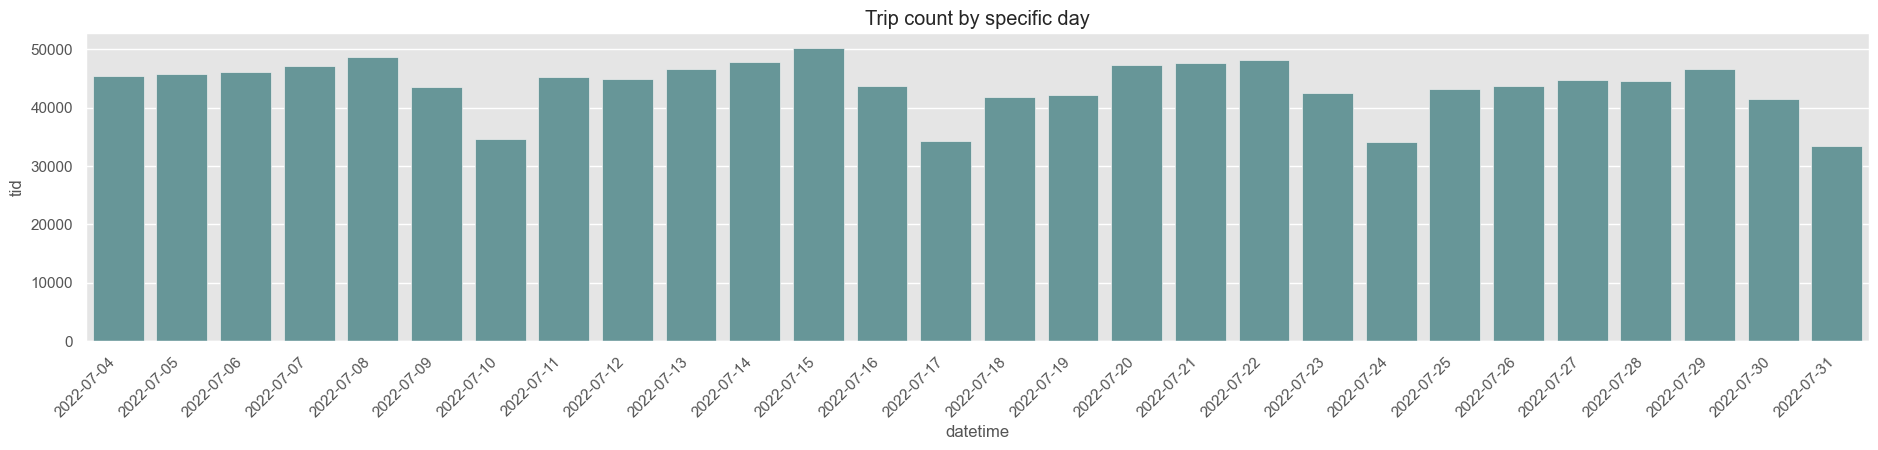

In [12]:
plt.figure(figsize=(23,4))
sns.barplot(data=origcount, 
             x='datetime',
             y='tid',
             color='cadetblue')
plt.title('Trip count by specific day')
plt.xticks(rotation=45, ha='right')

plt.savefig("N:\Output\Full Dataset\Stats\Trip_count_by_day.png", dpi=300, bbox_inches='tight')

plt.show()

#### Trips Per Day Count

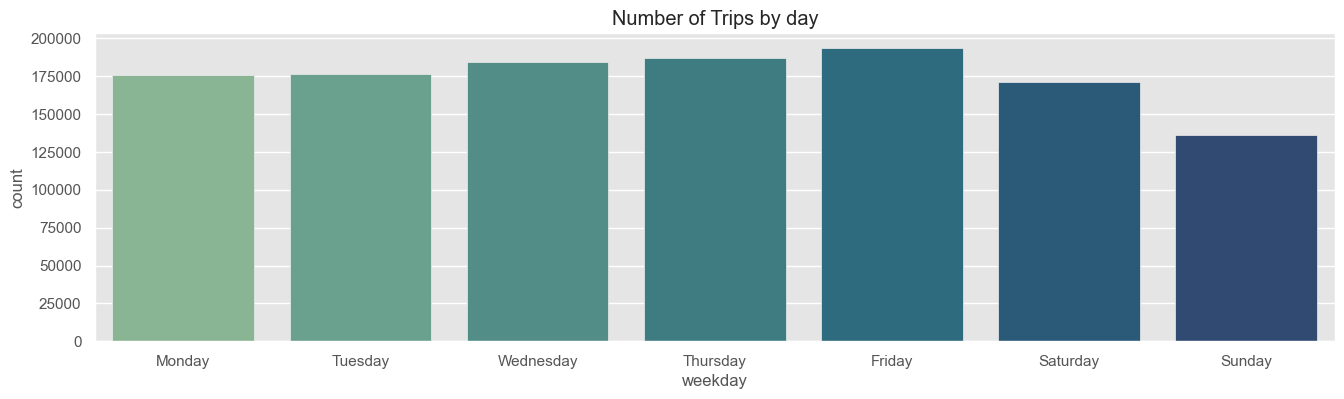

In [16]:
plt.figure(figsize=(16,4))
Main['weekday'] = Main['weekday'].astype('category')
sns.countplot(data= Main, 
              x='weekday', 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              width=0.8, 
              palette='crest')
plt.title('Number of Trips by day')

plt.savefig(r"N:\Output\Full Dataset\Stats\Number_of_Trips_by_day.png", dpi=300, bbox_inches='tight')

plt.show()

#### Distance travelled and speed travelled grouped by weekend and weekday

In [17]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Main['weekday'] = pd.Categorical(Main['weekday'], 
                                categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

#### Group days to Weekday

In [18]:
Main['hour']= Main['datetime'].apply(lambda x: str(x.hour).zfill(2)+':00').copy()

#### Trips Per Hour of Day on weekday

In [19]:
weekday = Main.query("weekday >='Monday'and weekday <='Friday'").copy()
weekdgroup = weekday.groupby('hour')['distance_straight_line'].mean()
dayofweek = weekdgroup.reset_index()

#### Group days to Weekend 

In [20]:
weekend = Main.query("weekday == 'Saturday'or weekday =='Sunday'").copy()

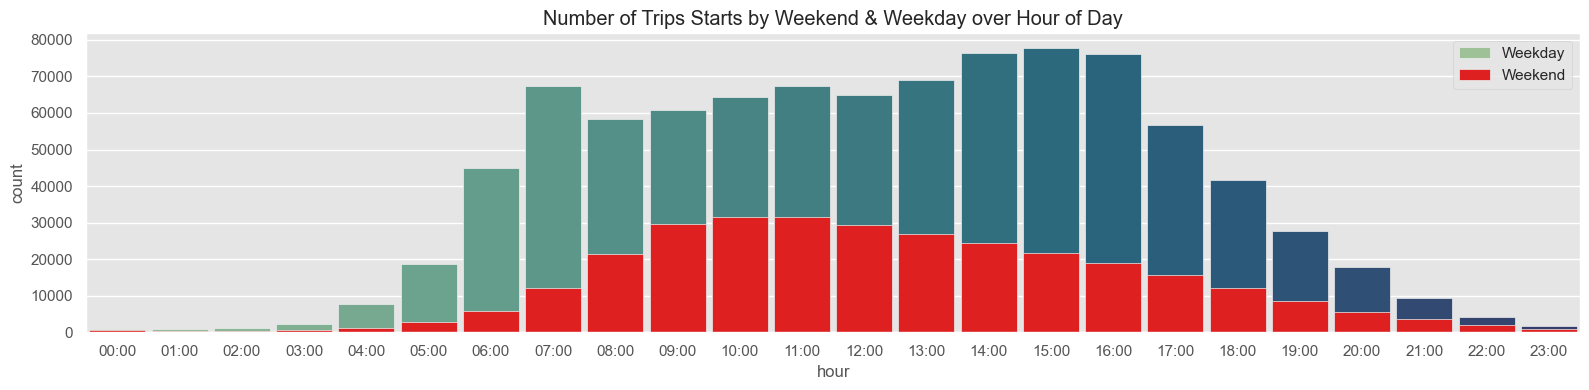

In [21]:
fig, ax = plt.subplots(1,figsize=(16,4))

Main['weekday'] = Main['weekday'].astype('category')
sns.countplot(data=weekday, 
              x='hour', 
              ax = ax,
              order=['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'],
              width=0.9, 
              palette='crest',
              label='Weekday')

sns.countplot(data=weekend, 
              x='hour', 
              ax = ax,
              order=['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'],
              width=0.9,
              label = 'Weekend',
              #palette='rocket',
              color='red')

plt.title('Number of Trips Starts by Weekend & Weekday over Hour of Day')

plt.savefig(r"N:\Output\Full Dataset\Stats\TripStarts by Weekend & Weekday over Hour of Day.png", dpi=300, bbox_inches='tight')

ax.legend()

plt.tight_layout()

### Distance Travelled per day of week

In [23]:
dfp = Main.groupby(['weekday','hour']).mean().copy().reset_index()

In [24]:
dfp['hour'] = dfp['hour'].astype('category')

In [25]:
dfp['hour'] = pd.to_datetime(dfp['hour'], format='%H:%M').dt.hour

In [26]:
intime = dfp.loc[(dfp['hour'] >= 6) & (dfp['hour'] <= 20)]

###### Distance in kilometers

In [27]:
df1 = intime.copy()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df1['weekday'] = pd.Categorical(df1['weekday'], 
                                categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

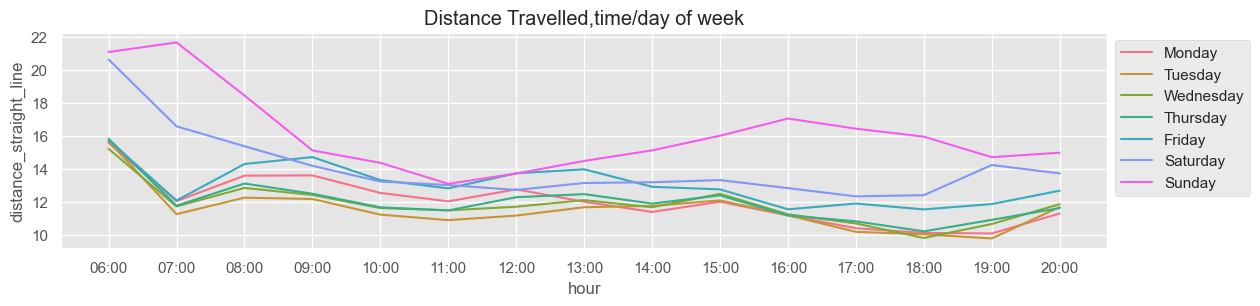

In [29]:
fig, ax = plt.subplots(figsize=(13.5,2.8))

sns.lineplot(data=df1,
             ax=ax,
             x='hour', 
             y='distance_straight_line', 
             hue='weekday', 
             palette='husl').legend(bbox_to_anchor=(1,1))

plt.xticks ([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#plt.yticks([0,4,8,12,16,19])
ax.set_xticklabels (['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00'])
plt.title('Distance Travelled,time/day of week')

plt.savefig(r"N:\Output\Full Dataset\Stats\Distance Travelled,time & day of week.png", dpi=300, bbox_inches='tight')

plt.show()

###### Distance in kilometers

In [30]:
weekendgroup = weekend.groupby('hour')['distance_straight_line'].mean()
dayweekend = weekendgroup.reset_index()

In [31]:
wd= weekday.loc[(weekday ['hour'] >= '06:00') & (weekday['hour'] <= '20:00')]

In [32]:
do= dayweekend.loc[(dayweekend ['hour'] >= '06:00') & (dayweekend ['hour'] <= '20:00')]

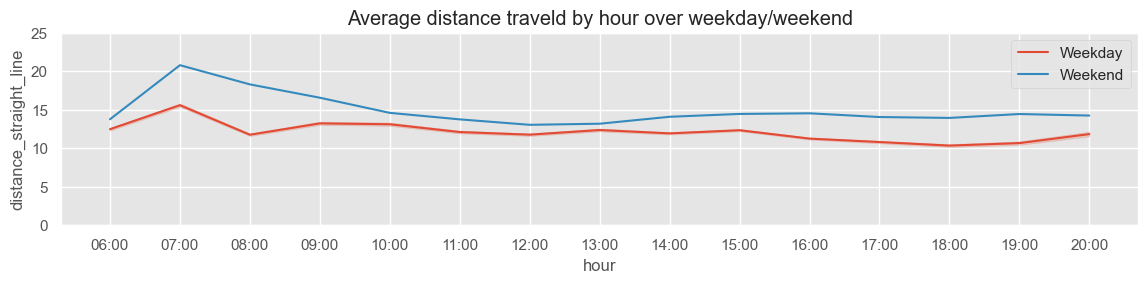

In [33]:
fig, ax = plt.subplots(figsize=(13.9,2.5))

sns.lineplot(data=wd,
             ax=ax,
             label='Weekday',
             x='hour',
             y= 'distance_straight_line')
sns.lineplot(data=do,
             ax=ax,
             label='Weekend',
             x='hour',
             y= 'distance_straight_line')



ax.set_xticklabels (['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00'])
plt.ylim(0,25)
ax.set_title('Average distance traveld by hour over weekday/weekend')

plt.savefig(r"N:\Output\Full Dataset\Stats\Average distance traveld by hour over weekday&weekend.png", dpi=300, bbox_inches='tight')

plt.show()

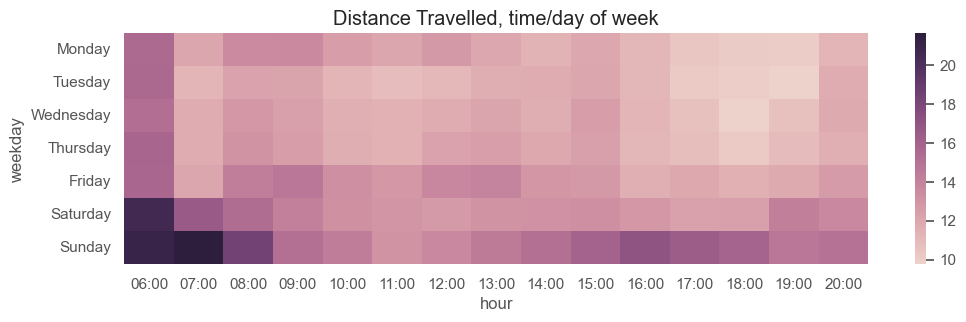

In [34]:
fig, ax = plt.subplots(1, figsize=(12,3))

sns.heatmap(df1.pivot("weekday","hour","distance_straight_line"), 
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels = (['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00']),
            )  

plt.title('Distance Travelled, time/day of week')

plt.savefig(r"N:\Output\Full Dataset\Stats\Distance Travelled, time & day of week.png", dpi=300, bbox_inches='tight')

plt.show()

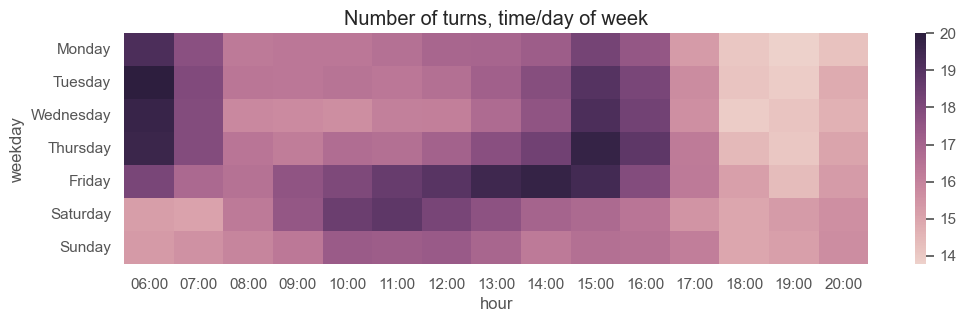

In [35]:
fig, ax = plt.subplots(1, figsize=(12,3))

sns.heatmap(df1.pivot("weekday","hour","num_of_turns"), 
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels = (['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00']),
            )  
plt.title('Number of turns, time/day of week')

plt.savefig(r"N:\Output\Full Dataset\Stats\Number of turns, time & day of week.png", dpi=300, bbox_inches='tight')

plt.show()

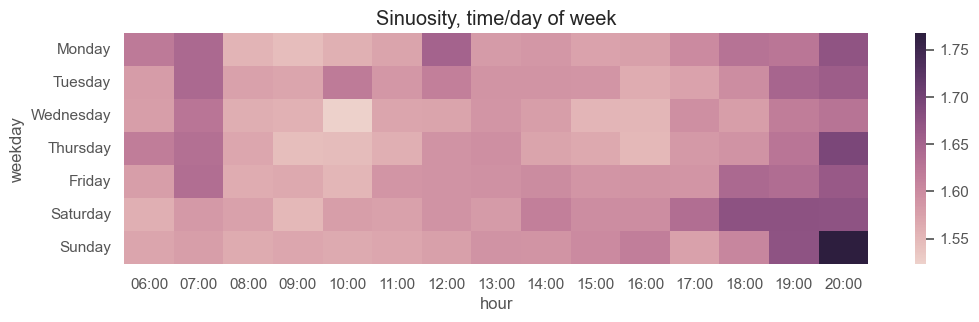

In [36]:
fig, ax = plt.subplots(1, figsize=(12,3))

sns.heatmap(df1.pivot("weekday","hour","sinuosity"), 
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels = (['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00']),
            )  
plt.title('Sinuosity, time/day of week')

plt.savefig(r"N:\Output\Full Dataset\Stats\Sinuosity, time & day of week.png", dpi=300, bbox_inches='tight')

plt.show()

In [37]:
Sim_sd = Main.loc[Main['sinuosity'] <= 1.4]

In [38]:
dif_sd = Main.loc[Main['sinuosity'] > 1.4]

In [39]:
Sim_sd.shape, dif_sd.shape

((668569, 14), (556701, 14))

In [40]:
largedif = round(556701/1225270 * 100, 2)
f"{largedif}% of observed routes are over 40% longer than shortest path distance"

'45.43% of observed routes are over 40% longer than shortest path distance'

### Relationship between variables

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Correlation

In [43]:
df2 =Main.copy().set_index('tid')

Look at Correlation. How features relate to each other. High correlations above 7 are multicollinear. 

In [44]:
df2.corr(method='pearson').round(3)

,distance_straight_line,Traveltime,StopTime,num_of_turns,abs_bearing_change,shortestPath_dist,speed,sinuosity
distance_straight_line,1.0000,0.9150,0.4940,0.4170,0.5940,0.9800,0.6120,0.0510
Traveltime,0.9150,1.0000,0.7500,0.6510,0.7950,0.8730,0.4450,0.1330
StopTime,0.4940,0.7500,1.0000,0.6380,0.6660,0.4500,0.0360,0.1650
num_of_turns,0.4170,0.6510,0.6380,1.0000,0.8830,0.3530,0.0140,0.2310
abs_bearing_change,0.5940,0.7950,0.6660,0.8830,1.0000,0.5270,0.1810,0.2280
shortestPath_dist,0.9800,0.8730,0.4500,0.3530,0.5270,1.0000,0.6090,-0.0610
speed,0.6120,0.4450,0.0360,0.0140,0.1810,0.6090,1.0000,-0.0370
sinuosity,0.0510,0.1330,0.1650,0.2310,0.2280,-0.0610,-0.0370,1.0000


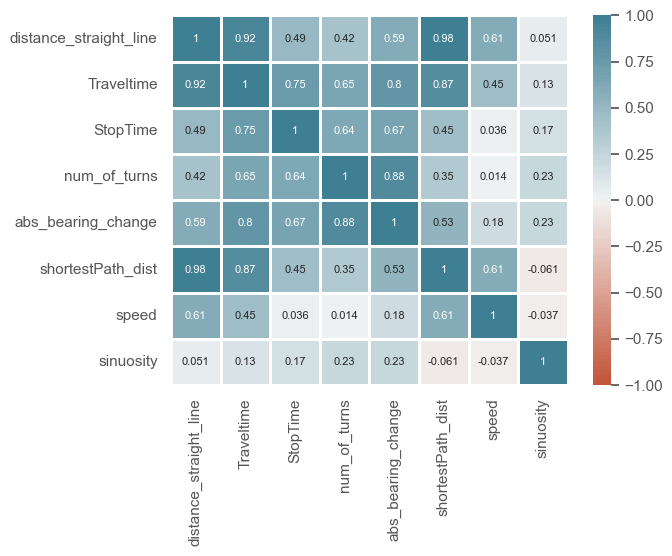

In [45]:
sns.heatmap(df2.corr(method='pearson').round(3), 
            cmap=sns.diverging_palette(20,220, n=100), 
            linecolor='white', 
            linewidth=1, 
            annot = True,
            vmax=1,
            vmin= -1,
            center=0,
            annot_kws={'size':8})

plt.savefig(r"N:\Output\Full Dataset\Stats\DataFeatures_Correlation.png", dpi=300, bbox_inches='tight')

plt.show()

                                        SPLIT - New Notebook